Pix2pix
==

**Reference**: [Image-to-Image Translation with Conditional Adversarial Networks](https://arxiv.org/abs/1611.07004)

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import torch
device = torch.device("cuda")

import matplotlib.pyplot as plt

In [2]:
load_path = 'trained_models/experiment4/'

save_path = load_path + 'test_results/'
if not os.path.exists(save_path):
    os.makedirs(save_path)
testA = '../dataset/facades/trainB'
testB = '../dataset/facades/trainA'

unet_flag = True

#### load check point

In [3]:
check_point = torch.load(load_path+'check_point.pth')

#### check training image

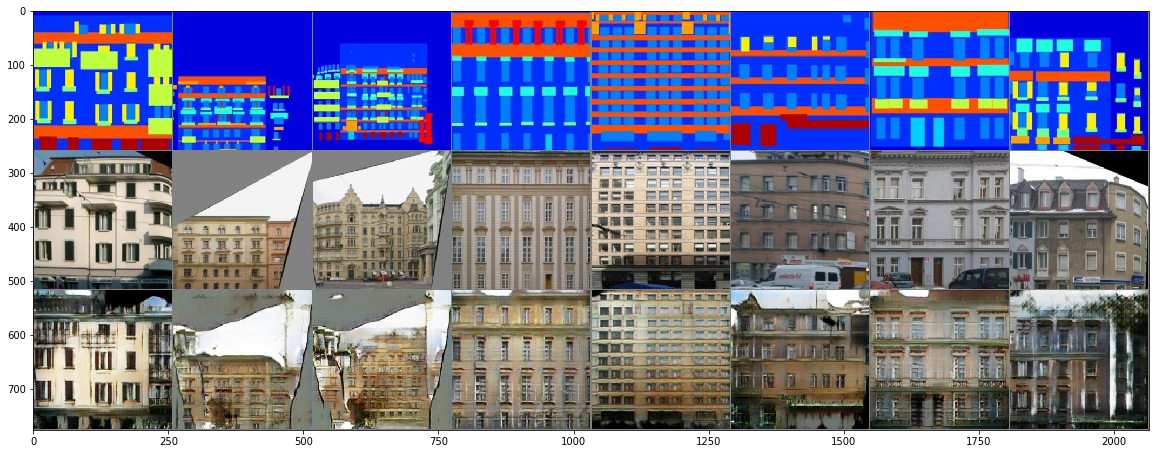

In [4]:
plt.figure(figsize=(20,20)); plt.imshow(plt.imread(load_path+"training_image.jpg")); plt.show()

#### check training loss

In [5]:
loss_seq = check_point['loss_seq']

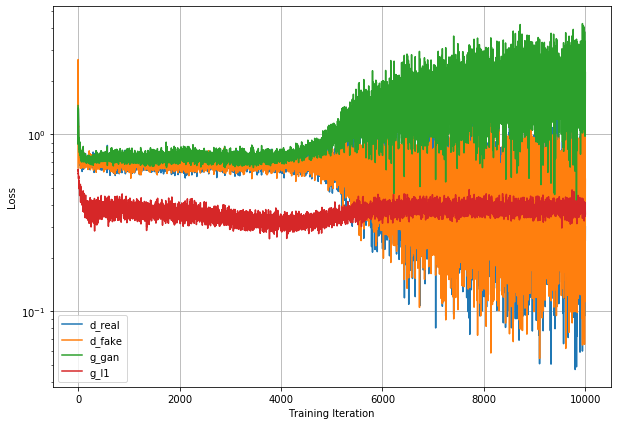

In [6]:
plt.figure(figsize=(10, 7))
for key, value in loss_seq.items():
    plt.semilogy(value, label=key)
plt.legend()
plt.xlabel("Training Iteration"), plt.ylabel("Loss"); 
plt.grid()
plt.show()

#### check performance with test data

In [7]:
from network import Generator, Discriminator
from utils import FacadeFolder, imsave, imshow

In [8]:
generator = Generator(unet_flag=unet_flag)
generator.load_state_dict(check_point['g_state_dict'])
# generator = generator.to(device).eval()
generator = generator.to(device)

discriminator = Discriminator()
discriminator.load_state_dict(check_point['d_state_dict'])
# discriminator = discriminator.to(device).eval()
discriminator = discriminator.to(device)

dataset = FacadeFolder(testA, testB, imsize=256)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)

400 datas loaded


In [9]:
performance = {'D_real':[], 'D_fake':[], 'L1':[], 'L2':[]}

for index, (itemA, itemB) in enumerate(dataloader):
    itemA, itemB = itemA.to(device), itemB.to(device)
    
    with torch.no_grad():
        fakeB = generator(itemA)    
        real = discriminator(itemB, itemA)
        fake = discriminator(fakeB, itemA)
        
    performance['D_real'].append(torch.mean(real).item())
    performance['D_fake'].append(torch.mean(fake).item())
    performance['L1'].append(torch.mean(torch.abs(fakeB - itemB)).item())
    performance['L2'].append(torch.mean(torch.sqrt( (fakeB-itemB)**2)).item())            
    imsave(torch.cat([itemA, itemB, fakeB], dim=0), save_path+"%d_test_image.jpg"%index)
    break

In [12]:
import numpy as np

In [14]:
for key, value in performance.items():
    print("%s: Mean/Std = [%2.2f/%2.2f]"%(key, np.mean(value), np.std(value)))

D_real: Mean/Std = [0.64/0.19]
D_fake: Mean/Std = [0.17/0.06]
L1: Mean/Std = [0.43/0.06]
L2: Mean/Std = [0.43/0.06]


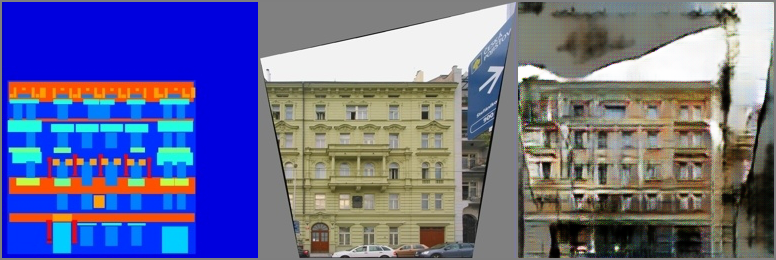

In [11]:
imshow(torch.cat([itemA, itemB, fakeB], dim=0))